In [2]:
# Install Lucid
!pip install --quiet lucid==0.3.1

# Fetch graph definition file
!wget https://hut.lepus.uberspace.de/dv_graph.pb.zip
!unzip dv_graph.pb.zip

--2018-11-29 20:30:33--  https://hut.lepus.uberspace.de/dv_graph.pb.zip
Resolving hut.lepus.uberspace.de (hut.lepus.uberspace.de)... 95.143.172.195, 2001:1a50:11:0:5f:8f:ac:c
Connecting to hut.lepus.uberspace.de (hut.lepus.uberspace.de)|95.143.172.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81167090 (77M) [application/zip]
Saving to: ‘dv_graph.pb.zip’

dv_graph.pb.zip     100%[===================>]  77.41M  4.84MB/s    in 11s     

2018-11-29 20:30:44 (7.12 MB/s) - ‘dv_graph.pb.zip’ saved [81167090/81167090]

Archive:  dv_graph.pb.zip
  inflating: dv_graph.pb             


In [0]:
# Imports

import lucid.optvis.render as render
import lucid.optvis.objectives as objectives
import lucid.optvis.transform as transform
import lucid.misc.io.showing
from lucid.modelzoo.vision_base import Model
from lucid.optvis.param.spatial import naive, fft_image
from lucid.optvis.param.color import to_valid_rgb
import tensorflow as tf
import numpy as np

In [1]:
# Lucid Model

class DeepVariantModel(Model):
    model_path = 'dv_graph.pb'
    image_shape = [100, 221, 6]
    image_value_range = (0, 1)
    input_name = 'shuffle_batch'
    def post_import(self, scope):
        print("graph imported!")

# Optimization function

def build_image(w, h=None, batch=None, sd=None, decorrelate=True, fft=True, alpha=False):
    h = h or w
    batch = batch or 1
    channels = 6
    shape = [batch, w, h, channels]
    param_f = fft_image if fft else naive
    t = param_f(shape, sd=sd)
    rgb = to_valid_rgb(t[..., :3], decorrelate=decorrelate, sigmoid=True)
    rgb2 = to_valid_rgb(t[..., :3], decorrelate=decorrelate, sigmoid=True)
    return tf.concat([rgb, rgb2], -1)
    if alpha:
        a = tf.nn.sigmoid(t[..., 3:])
        return tf.concat([rgb, a], -1)
    return rgb

param_f = lambda: build_image(100, 221, 64, fft=False, decorrelate=False)
#param_f = lambda: build_image(100, 221, 64, fft=True, decorrelate=True)

# Visualization functions

def channels_to_rgb(channels):
    # Reconstruct the original channels
    channels = channels.transpose([2, 0, 1])
    base = channels[0]
    qual = np.minimum(channels[1], channels[2])
    strand = channels[3]
    alpha = np.multiply(channels[4], channels[5])
    return np.multiply(
        np.stack([base, qual, strand]),
        alpha).transpose([1, 2, 0])

# Monkey-patch lucid's image showing function to deal with 6-channel images

def image(array, domain=None, w=None, format='png'):
    arrays = [channels_to_rgb(array[:, :221, :]), array[:, :221, :1], array[:, :221, 1:2], array[:, :221, 2:3], array[:, :221, 3:4], array[:, :221, 4:5], array[:, :221, 5:]]
    html = ""
    for array in arrays:
        data_url = lucid.misc.io.showing._image_url(array, domain=domain, fmt=format)
        html += '<img src=\"' + data_url + '\">'
    lucid.misc.io.showing._display_html(html)

lucid.misc.io.showing.image = image

NameError: ignored

In [0]:
# Load the model

deepvariant_model = DeepVariantModel()
deepvariant_model.load_graphdef()

In [0]:
# Channel names:
#
# InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu_1
# InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu_1
# InceptionV3/InceptionV3/Mixed_5d/concat_1
# InceptionV3/InceptionV3/Mixed_5b/concat_1
# InceptionV3/InceptionV3/Mixed_5c/concat_1
# InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu_1
# InceptionV3/Logits/SpatialSqueeze_1
# InceptionV3/InceptionV3/Mixed_7b/concat_1
# InceptionV3/InceptionV3/Mixed_7c/concat_1
# InceptionV3/InceptionV3/Mixed_7a/concat_1
# InceptionV3/Logits/Dropout_1b/dropout/mul_1
# InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool_1
# InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool_1
# InceptionV3/InceptionV3/Mixed_6a/concat_1
# InceptionV3/InceptionV3/Mixed_6c/concat_1
# InceptionV3/InceptionV3/Mixed_6b/concat_1
# InceptionV3/InceptionV3/Mixed_6e/concat_1
# InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu_1
# InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu_1
# InceptionV3/Predictions/Reshape_1_1
# InceptionV3/Logits/AvgPool_1a_2x5/AvgPool_1
# InceptionV3/InceptionV3/Mixed_6d/concat_1

graph imported!
32 [5.979524  5.9743342 5.986567  5.976316  5.971745  5.9907675 6.001169
 5.98299   6.010687  5.9827876 5.9912496 5.9640636 5.993463  5.9840555
 5.9769697 5.9816203 5.979254  5.962443  5.975621  5.9761286 5.9989896
 5.966324  5.9863396 5.975531  5.977758  5.9746532 5.980812  5.984074
 5.9922533 5.9749174 5.9927015 6.0010777 5.9777465 5.9989    5.9607687
 5.9983816 5.992281  5.9908476 5.958767  5.9670696 5.9740667 5.9974103
 5.979417  5.9640236 5.989593  5.9716907 5.9745793 5.993528  5.9763827
 5.975781  5.9856806 5.9760933 5.967394  5.9895234 6.00268   5.969566
 5.9751163 5.986259  5.9855843 5.9773607 5.9641075 5.9801707 5.970774
 5.982887 ]



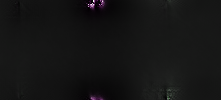
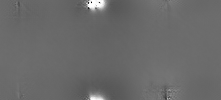
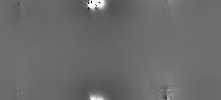
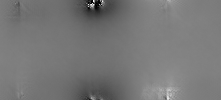
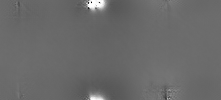
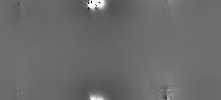
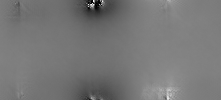

64 [5.3387375 5.3986087 5.425827  5.3340015 5.3542614 5.2787685 5.354045
 5.361738  5.3817873 5.294833  5.2504973 5.386199  5.3106837 5.340447
 5.2580123 5.353419  5.35089   5.3250613 5.291566  5.315552  5.302616
 5.3488307 5.304044  5.3501534 5.322551  5.3833723 5.3642426 5.4092464
 5.2936306 5.3551264 5.388801  5.279953  5.3537045 5.2944207 5.309602
 5.3955517 5.3216233 5.3076997 5.3335238 5.32044   5.3379393 5.3052835
 5.3284883 5.3273907 5.332304  5.31915   5.3620515 5.367181  5.3172812
 5.338124  5.236767  5.354343  5.320536  5.3854384 5.3711085 5.3334603
 5.3704896 5.317211  5.338664  5.327417  5.3698897 5.3582463 5.3554487
 5.3537893]



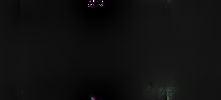
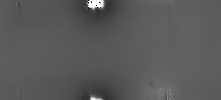
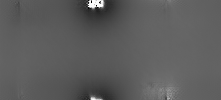
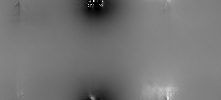
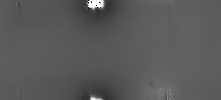
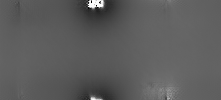
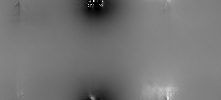

128 [16.232388 16.230864 16.224562 16.238617 16.227335 16.229515 16.236729
 16.232874 16.23604  16.234434 16.234064 16.232662 16.234953 16.234959
 16.236956 16.235765 16.233902 16.234509 16.235327 16.234137 16.23395
 16.235077 16.232674 16.232063 16.236252 16.231792 16.236292 16.232553
 16.233997 16.231602 16.231512 16.230818 16.235048 16.23432  16.23107
 16.23103  16.235943 16.235289 16.232191 16.231806 16.231466 16.236454
 16.231733 16.232752 16.236916 16.23311  16.234753 16.23157  16.237528
 16.230497 16.231497 16.238182 16.234123 16.230028 16.23123  16.231213
 16.229694 16.234003 16.234135 16.235214 16.230461 16.235579 16.232578
 16.232197]



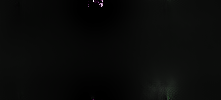
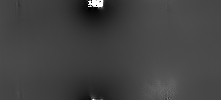
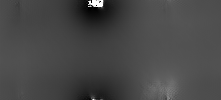
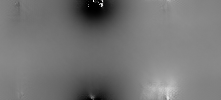
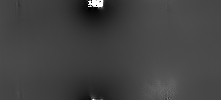
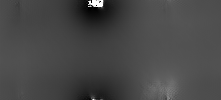
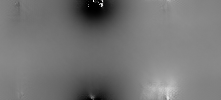

256 [12.23369   12.27366   12.221625  12.153906  12.312016  12.244455
 11.942609  12.277751  12.218805  11.75027   12.108742  12.351061
 12.2728405 11.87058   11.362847  12.298954  12.236001  11.75626
 11.765656  11.795867  12.211463  11.792505  12.263856  11.793758
 11.969055  12.296866  12.225762  12.273495  11.794526  12.302139
 12.263525  12.270499  12.324755  12.243451  12.313545  12.261158
 12.170518  11.903784  11.88105   11.684853  12.17632   12.3068
 12.090912  11.651116  12.308454  11.899569  12.167128  11.988024
 12.048253  12.310957  12.275849  11.823408  11.652752  12.283711
 12.147084  12.241263  12.278138  12.315066  12.314167  11.566114
 12.120089  12.305895  11.568178  11.917364 ]



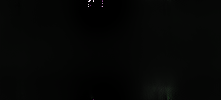
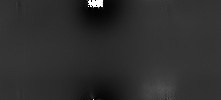
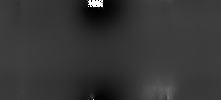
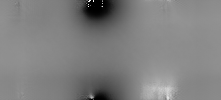
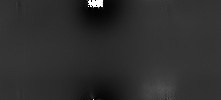
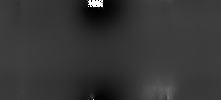
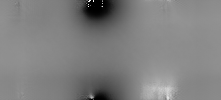

512 [10.948417  10.948254  10.941754  10.946945  10.949055  10.943921
 10.944306  10.949994  10.945686  10.947522  10.939258  10.950313
 10.951319  10.945218  10.939531  10.951871  10.950865  10.942959
 10.94237   10.9432745 10.952973  10.945296  10.947551  10.940912
 10.944039  10.95177   10.944311  10.945164  10.943194  10.946851
 10.946933  10.950719  10.95316   10.946408  10.9508    10.950844
 10.921922  10.944934  10.945634  10.944553  10.941135  10.952215
 10.942134  10.947916  10.952753  10.94519   10.945646  10.939999
 10.94652   10.948398  10.953299  10.943846  10.953131  10.945873
 10.947501  10.948284  10.949556  10.948465  10.952758  10.946669
 10.942404  10.9505    10.942552  10.94071  ]



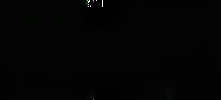
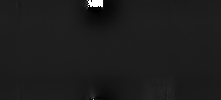
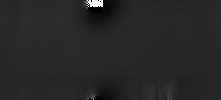
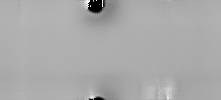
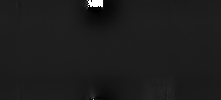
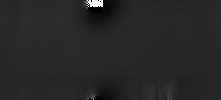
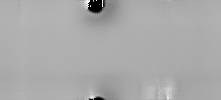

768 [11.611394  10.961623  10.972656  11.631217  11.6258135 11.6161995
 11.616861  11.591675  11.61699   11.5991745 11.618771  11.62606
 11.636775  11.620564  11.616574  11.630174  11.61832   11.599317
 11.613925  11.597452  11.650411  11.619573  11.61838   11.576444
 11.6156645 11.626184  11.601762  11.618134  11.62083   11.595204
 11.6191225 11.627359  11.627333  11.614923  11.631673  11.6270485
 11.628579  11.614718  11.600296  11.623738  11.604679  11.631985
 11.612245  11.659511  11.625686  11.606901  11.624047  11.622518
 11.622183  11.620589  11.622125  11.607009  11.624467  11.623147
 11.71239   11.625913  11.622383  11.625846  11.636183  11.6062
 11.614395  11.648804  11.620039  11.611121 ]



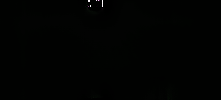
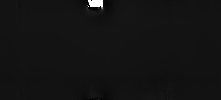
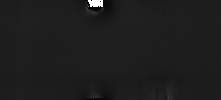
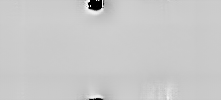
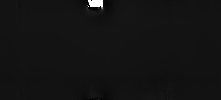
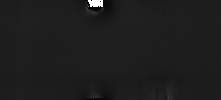
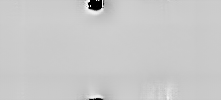

1024 [10.830789  10.83086   10.82098   11.021602   9.82164    9.827469
 10.829601   9.834726   9.843262  10.833368  10.828537   9.843218
 10.825242  10.823413   9.816796  10.831017  10.855426   9.842181
 10.825249  10.852785  10.825118  10.849061   9.83335   10.833479
  9.815541  10.406177  10.824696   9.848226  10.824981   9.820053
 10.460018   9.827197  10.83467   10.8283    10.872748  10.831685
 10.827601  10.821362  10.828308  10.829999  10.823495  10.835907
 10.833434  10.822366  10.832196  10.835149  10.827424  10.426432
 10.229529   9.820398  10.826803  10.828793  10.840596   9.88258
 10.825453   9.842487   9.822569   9.8207245 10.825181  10.840488
 10.500365  10.827967   9.846571  10.831355 ]



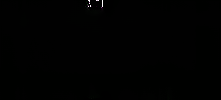
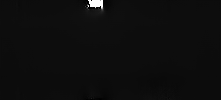
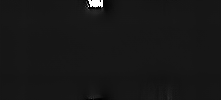
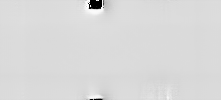
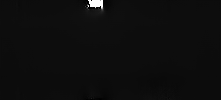
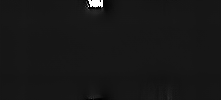
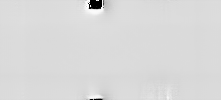

[array([[[[0.42111933, 0.4276389 , 0.4822151 , 0.42111933, 0.4276389 ,
           0.4822151 ],
          [0.4179589 , 0.42137122, 0.47681847, 0.4179589 , 0.42137122,
           0.47681847],
          [0.4154517 , 0.42209008, 0.47498536, 0.4154517 , 0.42209008,
           0.47498536],
          ...,
          [0.41432652, 0.4219775 , 0.48328105, 0.41432652, 0.4219775 ,
           0.48328105],
          [0.4164865 , 0.4239833 , 0.48323545, 0.4164865 , 0.4239833 ,
           0.48323545],
          [0.4197689 , 0.42644656, 0.48420262, 0.4197689 , 0.42644656,
           0.48420262]],
 
         [[0.4191939 , 0.42588547, 0.4829429 , 0.4191939 , 0.42588547,
           0.4829429 ],
          [0.41537192, 0.42212266, 0.47709453, 0.41537192, 0.42212266,
           0.47709453],
          [0.41857576, 0.42404288, 0.4787826 , 0.41857576, 0.42404288,
           0.4787826 ],
          ...,
          [0.41317493, 0.42068985, 0.48111305, 0.41317493, 0.42068985,
           0.48111305],
          [0.4175

In [0]:
# Render
transforms = []
jitter = 12
transforms = [transform.pad(2*jitter), transform.jitter(jitter)]

#objective = objectives.channel("InceptionV3/InceptionV3/Mixed_5b/concat", 0)
#objective = objectives.channel("InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu", 0)
objective = objectives.neuron("InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu", 0, 8, 56)
render.render_vis(deepvariant_model, objective, param_f=param_f, transforms=transforms, thresholds=[32, 64, 128, 256, 512, 768, 1024])